In [1]:
import pickle
from os import listdir
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from PIL import Image
import matplotlib.pyplot as plt


C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
default_image_size = tuple((224, 224))

In [3]:
# PATHS
directory_root = "C://Users//LENOVO//Desktop//Project-Crop Disease//New folder"
model_path = 'C://Users//LENOVO//Desktop/Project-Crop Disease/Classifier_Model.model'

In [4]:
def convert_image_to_array(image_dir):
    try:
        im_size=224
        
        image = cv2.imread(image_dir)
        image = cv2.resize(image, dsize=(im_size, im_size))
                
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
image_list, label_list = [], []
imsize=256

try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}//{plant_folder}")

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}//{plant_folder}//{plant_disease_folder}//")

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}//{plant_folder}//{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image=cv2.imread(image_directory)
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Tomato_Late_blight ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Tomato__Target_Spot ...
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Processing Tomato__Tomato_YellowLeaf__Curl_Virus ...
[INFO] Image loading completed


## Load Model

In [6]:
# label_list

In [7]:
model = keras.models.load_model(model_path)

In [8]:
label_binarizer = LabelBinarizer()

In [9]:
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))

In [10]:
n_classes = len(label_binarizer.classes_)
label_binarizer.classes_

array(['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
       'Tomato_Late_blight', 'Tomato_Leaf_Mold',
       'Tomato_Septoria_leaf_spot',
       'Tomato_Spider_mites_Two_spotted_spider_mite',
       'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
       'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'], dtype='<U43')

## IMAGE

In [11]:
image_path = 'C://Users//LENOVO//Desktop/Project-Crop Disease//test_1.jpg'

In [12]:
test_img = convert_image_to_array(image_path)

lst = []
lst.append(test_img)
test_list = np.array(lst, dtype=np.float16) / 225.0


### passing into model


In [13]:
test_pred = model.predict(test_list)

1/1 [==============================] - 1s 908ms/step


In [14]:
test_pred

array([[9.9997842e-01, 3.5065335e-07, 5.3515664e-06, 2.2130153e-07,
        9.8840092e-14, 2.1253599e-09, 2.0826633e-06, 2.7852948e-07,
        2.1929683e-09, 1.3286169e-05, 3.2244010e-11, 5.6575683e-10,
        1.4180346e-10, 4.4699803e-16, 6.2713804e-14]], dtype=float32)

In [15]:
var = np.argmax(test_pred)
print("At INDEX {}".format(var))

At INDEX 0


In [16]:
output = label_binarizer.classes_[np.argmax(test_pred)]

In [17]:
#calculate confidence
confidence = round(100 * (np.max(test_pred[0])), 2)

# Plot

Disease detected: Pepper__bell___Bacterial_spot
Predicticed with a confidence of :  100.0


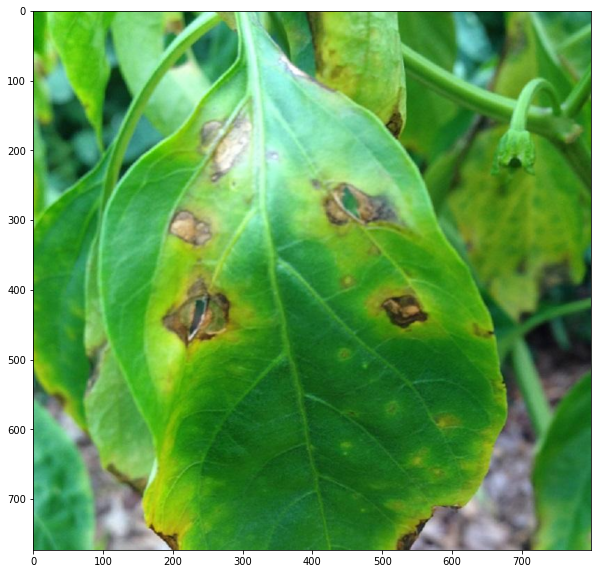

In [18]:
img = Image.open(image_path)
img = np.array(img)
plt.figure(figsize = (10, 10))
plt.imshow(img)


print("Disease detected: {}".format(output))
print("Predicticed with a confidence of :  {}".format(confidence))